In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from skimage.color import rgb2gray, gray2rgb
from skimage import data
from PIL import Image

from time import time 

import cv2
import os

In [88]:
image_dir = './VOCdevkit/VOC2012/JPEGImages/'
test_image = '2012_000040.jpg'
image_path = image_dir + test_image
I = plt.imread(image_dir + test_image)
I.shape

(374, 500, 3)

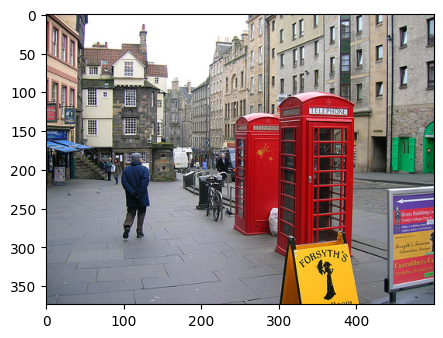

In [89]:
plt.figure(figsize=(5,5))
plt.imshow(I)
plt.show()

In [90]:
img = cv2.imread(image_path)
img.shape

(374, 500, 3)

In [91]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(374, 500)

In [93]:
lower_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lowerbody.xml")
body_classifier  = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")
body  = body_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(10, 10))

In [94]:
    
for (x, y, w, h) in body:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 128), 3)

In [95]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 499.5, 373.5, -0.5)

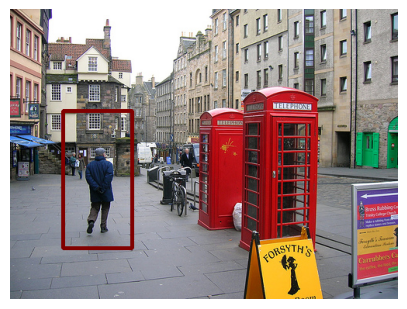

In [96]:
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.axis('off')

# Ejercicio 1

In [12]:
walking_train_txt_dir = './VOCdevkit/VOC2012/ImageSets/Action/walking_train.txt' 

In [97]:
file_path = walking_train_txt_dir
with open(file_path, 'r') as file:
		lines = file.readlines()

data = []
for line in lines:
		line = line.strip()
		file_name = line.split('  ')[0]
		if not file_name.startswith('2012'): continue
		object_idx = line.split('  ')[1]	
		object_in  = line.split('  ')[2]
		if object_in != '1': continue
		data.append([
				file_name,
				object_idx,
				object_in
		])

In [98]:
import cv2
# X is the numpy array of pictures in data
X = []
Y = []
image_dir = './VOCdevkit/VOC2012/JPEGImages/'
observed_images = []
for d in data:
	file_name = d[0] + '.jpg'
	if file_name in observed_images: continue
	X.append(file_name)
	observed_images.append(file_name)
	


In [99]:

'''
Detects full body in a picture
'''
def detect_full_body_cascade(image_path):
		img = cv2.imread(image_path)
		gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		body_classifier  = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")
		body  = body_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=2, minSize=(10, 10))
		boxes = []
		image_width = img.shape[1]
		image_height = img.shape[0]
		for (x, y, w, h) in body:
				boxes.append([x/image_width, (x + w)/image_width,y/image_height, (y + h)/image_height])					
		return boxes		

In [100]:
for image in X:
		boxes = detect_full_body_cascade(image_dir + image)
		Y.append(boxes)

In [101]:
def draw_boxes(image_path, boxes):
		img = cv2.imread(image_path)
		for box in boxes:
				x1 = int(box[0] * img.shape[1])
				x2 = int(box[1] * img.shape[1])
				y1 = int(box[2] * img.shape[0])
				y2 = int(box[3] * img.shape[0])
				cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 128), 3)
		return img

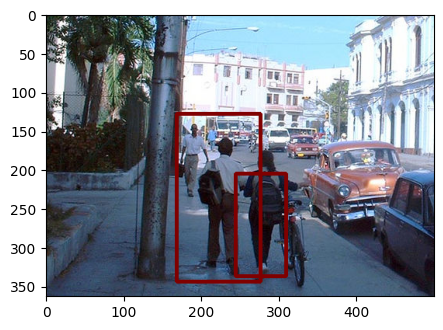

In [104]:
img = draw_boxes(image_dir + X[3], Y[3])
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)

In [105]:
# import ET
import xml.etree.ElementTree as ET
# Obtain real data

def obtain_real_boxes(image_name):
		# Obtain .xml file
		xml_file_name = image_name.replace('.jpg', '.xml')
		xml_file_path = './VOCdevkit/VOC2012/Annotations/' + xml_file_name

		# Read the xml file
		tree = ET.parse(xml_file_path)
		root = tree.getroot()
		# Get <size> tag
		size = root.find('size')
		width, height = int(size.find('width').text), int(size.find('height').text)
		# Get <object> tags
		objects = root.findall('object')
		boxes = []
		# get <actions> tags inside <object> tags
		for obj in objects:
				actions = obj.find('actions')
				# if <walking> tag value is not 1, continue
				walking = actions.find('walking').text
				if walking != '1': continue
				# Get <bndbox> tags inside <actions> tags
				bndbox = obj.findall('bndbox')
				
				for box in bndbox:
						# Get <xmin>, <xmax>, <ymin>, <ymax> tags inside <bndbox> tags
						xmin = int(box.find('xmin').text) / width
						xmax = int(box.find('xmax').text) / width
						ymin = int(box.find('ymin').text) / height
						ymax = int(box.find('ymax').text) / height
						boxes.append([xmin, xmax, ymin, ymax])
		return boxes
		

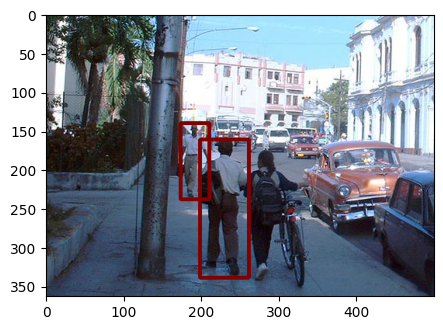

In [106]:
img = draw_boxes(image_dir + X[3], obtain_real_boxes(X[3]))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)

In [107]:
Y_real = []
for img in X:
		Y_real.append(obtain_real_boxes(img))